The contents of this script are independently licensed under the Creative Commons Attribution 4.0 International License (CC BY 4.0). This licensing applies solely to this script and does not affect the licensing terms of the source repository, should they differ. © 2024 Luca Kunz.

# Exemplary analysis of TRAPs in the GPGP

This script provides examples from our analysis of TRAPs in the GPGP. It can be used as a starting point for further analyses.

In [1]:
import os
import sys
import numpy as np
import pandas as pd
import time
import datetime
import pickle
import scipy.stats as stats

import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib.gridspec import GridSpec

from IPython.display import display, Audio
# import jupyter notebook files like regular python modules
import import_ipynb
from aa_define_classes import TRAPSdata

importing Jupyter notebook from aa_define_classes.ipynb


In [2]:
# measure the computation time for the entire script
start_script_timer = time.perf_counter()

# Preliminary

## Pickle object saving function

In [3]:
def save_object(obj, filename):
    with open(filename, 'wb') as outp:  # overwrites any existing file.
        pickle.dump(obj, outp, pickle.HIGHEST_PROTOCOL)

## Files and paths

In [4]:
# if script is running in jupyter lab
if sys.argv[0].endswith("ipykernel_launcher.py"):
    # set the velocity product
    vel_product_ID = 1
    epsilon_ID = 1
    rho_ID = 1
    notebook_run = True
#    save_fig = True
    save_fig = False

    
# if script is running as python script
else:
    # read in product from bash
    vel_product_ID = int(sys.argv[1])
    # read in epsilon from bash
    epsilon_ID = int(sys.argv[2])
    # read in rho from bash
    rho_ID = int(sys.argv[3])
    notebook_run = False
    save_fig = True


vel_product_short = ['ENSRYS_24HM', 'MULTIOBS_24HI', 'MULTIOBS_24HM', 'SEALEVEL_24HI'][vel_product_ID]

vel_product_long = ['CMEMS GLOBAL_REANALYSIS_PHY_001_031 ENSEMBLE MEAN (1/4°, 24HM)', 
                    'CMEMS MULTIOBS_GLO_PHY_REP_015_004 (1/4°, 24HI)', 
                    'CMEMS MULTIOBS_GLO_PHY_REP_015_004 (1/4°, 24HM)', 
                    'CMEMS SEALEVEL_GLO_PHY_L4_MY_008_047 (1/4°, 24HI)'][vel_product_ID]


years = ['2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', 
         '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019']

epsilon_value = [0.1, 0.25, 0.5, 0.75, 1.0, 1.25, 1.5, 1.75, 2.0][epsilon_ID]
epsilon_string = ['_e010', '_e025', '_e050', '_e075', '_e100', '_e125', '_e150', '_e175', '_e200'][epsilon_ID]

rho_kmvalue = [50, 75, 100, 150, 200, 250, 300][rho_ID] # in kilometres
rho_kmstring = ['_r050', '_r075', '_r100', '_r150', '_r200', '_r250', '_r300'][rho_ID] # in kilometres

gdp_product_ID = 2 # set this a priori
gdp_product_short = ['GDP_1HI', 'GDP_6HI', 'GDP_24HI'][gdp_product_ID]

In [5]:
# define the path to the pkl files
pkl_TRAPS_importpath = 'export_pkl/' + vel_product_short + '/20XX/'
pkl_HPS_importpath = 'export_pkl/' + vel_product_short + '/'

# Import DataFrames

## Load TRAPS data

In [6]:
# comment out the attributes which shall not be loaded
# or simply define a list by yourself
columns_to_load = [
    'TRAP_ID', 
    'time', 
    'core_lon', 
    'core_lat', 
    'core_attraction', 
    'curve_lons', 
    'curve_lats', 
    # 'curve_attractions', 
    'origin_ID', 
    'lifetime', 
    'age', 
    # 'track_s1_peak', 
    'core_U', 
    'core_V', 
    # 'vircle', 
    # 'phase_shift', 
    # 'vircle_lons', 
    # 'vircle_lats', 
    # 'vircle_VORs', 
    # 'vircle_VORs_NBV', 
    # 'pattern_flag', 
    # 'pattern_agreement', 
    # 'pattern_flag_NBV', 
    # 'pattern_agreement_NBV', 
    # 'configu_flag', 
    # 'configu_flag_NBV', 
    # 'qorder_flag', 
    # 'qorder_flag_NBV'
]

In [7]:
# the lists to store the subdataframes to feed into pd.concat() after the loop
pd_TRAPS_sdfs = []

for year in years:
    
    start_timer = time.perf_counter()
    
    # define the pkl files to load
    pkl_TRAPS_importname = vel_product_short + epsilon_string + '_TRAPS_GPGP_' + year + '.pkl'
    
    # load the pickle objects
    with open(pkl_TRAPS_importpath + pkl_TRAPS_importname, 'rb') as inp:
                
        # load the full dataset
        # pd_TRAPS_sdfs.append(pickle.load(inp).pd_TRAPS_df.copy())

        # or select attributes to save memory and speed up the loading
        pd_TRAPS_sdfs.append(pickle.load(inp).pd_TRAPS_df[columns_to_load].copy())

        
    stop_timer = time.perf_counter()
    print('loaded ' + pkl_TRAPS_importname + f' in: {stop_timer - start_timer:0.1f} seconds')

              
# stack the yearly dataframes
pd_TRAPS_df = pd.concat(pd_TRAPS_sdfs, copy=True)

# reset the index after stacking
pd_TRAPS_df.reset_index(drop=True, inplace=True)

# save memory
del pd_TRAPS_sdfs

loaded MULTIOBS_24HI_e025_TRAPS_GPGP_2000.pkl in: 5.0 seconds
loaded MULTIOBS_24HI_e025_TRAPS_GPGP_2001.pkl in: 4.8 seconds
loaded MULTIOBS_24HI_e025_TRAPS_GPGP_2002.pkl in: 4.3 seconds
loaded MULTIOBS_24HI_e025_TRAPS_GPGP_2003.pkl in: 4.1 seconds
loaded MULTIOBS_24HI_e025_TRAPS_GPGP_2004.pkl in: 4.3 seconds
loaded MULTIOBS_24HI_e025_TRAPS_GPGP_2005.pkl in: 4.1 seconds
loaded MULTIOBS_24HI_e025_TRAPS_GPGP_2006.pkl in: 4.4 seconds
loaded MULTIOBS_24HI_e025_TRAPS_GPGP_2007.pkl in: 3.4 seconds
loaded MULTIOBS_24HI_e025_TRAPS_GPGP_2008.pkl in: 4.6 seconds
loaded MULTIOBS_24HI_e025_TRAPS_GPGP_2009.pkl in: 3.7 seconds
loaded MULTIOBS_24HI_e025_TRAPS_GPGP_2010.pkl in: 3.8 seconds
loaded MULTIOBS_24HI_e025_TRAPS_GPGP_2011.pkl in: 3.8 seconds
loaded MULTIOBS_24HI_e025_TRAPS_GPGP_2012.pkl in: 4.1 seconds
loaded MULTIOBS_24HI_e025_TRAPS_GPGP_2013.pkl in: 4.2 seconds
loaded MULTIOBS_24HI_e025_TRAPS_GPGP_2014.pkl in: 4.0 seconds
loaded MULTIOBS_24HI_e025_TRAPS_GPGP_2015.pkl in: 4.3 seconds
loaded M

## Get TRAPS ranking metrics table

Get a subdataframe of all TRAP trajectories and their lifetimes.

In [8]:
# dataframe containing all origin IDs and their counts, i.e. lifetimes
pd_RMT_df = pd_TRAPS_df[['origin_ID', 'lifetime']].groupby('origin_ID').max().sort_values('lifetime', ascending=False).copy()
pd_RMT_df.reset_index(drop=False, inplace=True)

In [9]:
# print check
pd_TRAPS_df
pd_RMT_df

,origin_ID,lifetime
0,200812220000 129,294
1,200902260000 331,292
2,200109290000 284,269
3,200301210000 446,269
4,201204300000 213,264
...,...,...
720386,200009110000 316,1
720387,200601250000 542,1
720388,201207130000 367,1
720389,200601250000 550,1


## Load HPS data

In [10]:
# define the pkl file to load
pkl_HPS_importname = vel_product_short + epsilon_string + '_' + gdp_product_short
pkl_HPS_importname += '_TRAPS_DRIFTERS_HPS_0019' + rho_kmstring + '.pkl'

# load the pickle object
with open(pkl_HPS_importpath + pkl_HPS_importname, 'rb') as inp:
    # cdf for current DataFrame, this will be overwritten every loop to save memory
    pd_HPS_df = pickle.load(inp).pd_TRAPS_df.copy()

# get the description of the dataset
with open(pkl_HPS_importpath + pkl_HPS_importname, 'rb') as inp: 
    hps_description = pickle.load(inp).product_long

# reset the index after loading
pd_HPS_df.reset_index(drop=True, inplace=True)

In [11]:
# print check
pd_HPS_df

,pair_ID,origin_ID,retention_time,proximity_time,TRAP_lifetime,minimum_TRAP_age,reachable,vircles_always_available,involved_attractions,involved_qorders,involved_phase_shifts,retention_nages,original_core_distances,original_curve_distances,drogued
0,201310310000 000000000101916 201310270000 344,201310270000 344,46,1104,93,5,True,True,"[-0.139247397665006, -0.133322592384704, -0.14...","[2.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, ...","[4.430945874178001, 4.954220006808431, 5.01636...","[0.0, 0.022222222222222223, 0.0444444444444444...","[21.63602628438114, 27.218985418574956, 25.023...","[14.726172213721245, 22.42580327745963, 22.921...",True
1,201905270000 300234066316870 201905150000 291,201905150000 291,45,1080,81,13,True,True,"[-0.20999680205224, -0.196616953730887, -0.196...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[1.4909013430791804, 1.4696727712275444, 1.509...","[0.0, 0.022727272727272728, 0.0454545454545454...","[69.84518738773463, 46.86426584419498, 36.5879...","[69.67409225165218, 46.92543720394726, 36.4688...",True
2,201507280000 000000000132718 201507280000 374,201507280000 374,44,1056,57,1,True,True,"[-0.201265758720064, -0.19937420075606, -0.181...","[0.0, 0.0, 0.0, 0.0, 0.0, 2.0, 0.0, 0.0, 0.0, ...","[5.207125086723592, 5.248221535516462, 5.36299...","[0.0, 0.023255813953488372, 0.0465116279069767...","[44.39999983897825, 30.620572475120394, 16.955...","[38.90789304323914, 21.04790099011558, 1.40130...",True
3,200010120000 000000009729746 200010120000 069,200010120000 069,41,984,88,1,True,True,"[-0.181595150679058, -0.205832111166168, -0.20...","[1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, ...","[3.432881234756834, 3.4329792126763725, 3.4690...","[0.0, 0.025, 0.05, 0.075, 0.1, 0.125, 0.15, 0....","[61.133880337996544, 55.559512408494975, 49.23...","[54.559969221516106, 51.084681066096465, 42.73...",True
4,201102160000 000000000093582 201101310000 284,201101310000 284,39,936,55,17,True,True,"[-0.107347613092045, -0.111451057209841, -0.12...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[4.322312406238966, 4.600036111789788, 4.46473...","[0.0, 0.02631578947368421, 0.05263157894736842...","[51.59612662718492, 25.10434105324435, 19.7163...","[51.596141667616735, 23.93646643677028, 18.867...",True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62339,201103250000 000000000083560 201103250000 437,201103250000 437,1,24,2,1,False,True,[-0.16899477078028],[1.0],[5.390509011270028],[],[58.11148631641262],[52.365780338880654],False
62340,201103250000 000000000070914 201101250000 054,201101250000 054,1,24,70,60,True,True,[-0.40083146221308],[0.0],[4.776045595492729],[],[65.05433042704217],[45.26822944327256],False
62341,201103250000 000000000063828 201103030000 065,201103030000 065,1,24,30,23,True,True,[-0.24310940143133],[0.0],[6.138525011551468],[],[54.92517681455478],[14.871330290592807],False
62342,201103240000 000000000090138 201103240000 241,201103240000 241,1,24,4,1,True,True,[-0.228641361413956],[1.0],[3.9887105766753943],[],[72.63984723215371],[45.75185209596553],False


## DataFrame columns to numpy arrays

In [12]:
# referring to every TRAP instance
core_lons = pd_TRAPS_df.core_lon.to_numpy(copy=True)
core_lats = pd_TRAPS_df.core_lat.to_numpy(copy=True)
curve_lons = pd_TRAPS_df.curve_lons.to_numpy(copy=True)
curve_lats = pd_TRAPS_df.curve_lats.to_numpy(copy=True)

core_attractions = pd_TRAPS_df.core_attraction.to_numpy(copy=True)
origin_IDs = pd_TRAPS_df.origin_ID.to_numpy(copy=True)
lifetimes = pd_TRAPS_df.lifetime.to_numpy(copy=True)

In [13]:
# referring to every TRAP trajectory
origin_IDs_RMT = pd_RMT_df.origin_ID.to_numpy(copy=True)
lifetimes_RMT = pd_RMT_df.lifetime.to_numpy(copy=True)

In [14]:
# referring to every drifter-TRAP pair
pair_IDs = pd_HPS_df.pair_ID.to_numpy(copy=True)
retention_times = pd_HPS_df.retention_time.to_numpy(copy=True) # in days
drogueds = pd_HPS_df.drogued.to_numpy(copy=True)

In [15]:
# get all timestamps, this contains duplicates, use the DatetimeIndex object type
timestamps = pd.to_datetime(pd_TRAPS_df.time.to_numpy())

# the TRAPS timestamps shall determine the snapshots of the plotting loop
snapshots = pd.to_datetime(np.unique(timestamps)) # we want this sorted

# generate strings from the snapshot timestamps
snapshot_strings = snapshots.strftime('%Y-%m-%d')

In [16]:
# print check
snapshot_strings

Index(['2000-01-01', '2000-01-02', '2000-01-03', '2000-01-04', '2000-01-05',
       '2000-01-06', '2000-01-07', '2000-01-08', '2000-01-09', '2000-01-10',
       ...
       '2019-12-22', '2019-12-23', '2019-12-24', '2019-12-25', '2019-12-26',
       '2019-12-27', '2019-12-28', '2019-12-29', '2019-12-30', '2019-12-31'],
      dtype='object', length=7305)

## Domain boundaries

In [17]:
# plot the boundaries of the approximate velocity domain
wbound_AVD = -160
ebound_AVD = -125
sbound_AVD = 22.5
nbound_AVD = 42.5

# plot the boundaries of the coincidence velocity grid
wbound_CVD = wbound_AVD + 0.125
ebound_CVD = ebound_AVD - 0.125
sbound_CVD = sbound_AVD + 0.125
nbound_CVD = nbound_AVD - 0.125

# Preliminary attraction statistics

Since the core attractions is an instantaneous feature, we compute statistics on the set of all TRAP instances, not trajectories.

In [18]:
# mean and standard deviation of the distribution of core attraction rates
mean_attraction = np.mean(core_attractions)
std_attraction = np.std(core_attractions)

mean_attraction, std_attraction

(-0.2327308126102493, 0.10569194708195355)

In [19]:
# the strongest TRAP instance
pd_TRAPS_df[core_attractions==core_attractions.min()]

,TRAP_ID,time,core_lon,core_lat,core_attraction,curve_lons,curve_lats,origin_ID,lifetime,age,core_U,core_V
1547440,243,2007-08-02,-125.293142,39.440386,-1.724717,"[-125.125, -125.20812621911332, -125.291363917...","[39.4328798085408, 39.43630986713763, 39.44029...",200708020000 243,64,1,NaN,NaN


In [20]:
# the trajectory containing the strongest TRAP instance
pd_TRAPS_df[origin_IDs==origin_IDs[core_attractions==core_attractions.min()][0]]

,TRAP_ID,time,core_lon,core_lat,core_attraction,curve_lons,curve_lats,origin_ID,lifetime,age,core_U,core_V
1547440,243,2007-08-02,-125.293142,39.440386,-1.724717,"[-125.125, -125.20812621911332, -125.291363917...","[39.4328798085408, 39.43630986713763, 39.44029...",200708020000 243,64,1,NaN,NaN
1547954,259,2007-08-03,-125.290815,39.431099,-1.658443,"[-125.134443829877, -125.21403729651911, -125....","[39.4236556374241, 39.42700222352904, 39.43149...",200708020000 243,64,2,-0.019044,0.006090
1548447,259,2007-08-04,-125.331489,39.449858,-1.592439,"[-125.125, -125.20755747018995, -125.290626932...","[39.4328370888428, 39.43973748266025, 39.44636...",200708020000 243,64,3,-0.034681,0.018905
1548938,224,2007-08-05,-125.360656,39.460498,-1.572383,"[-125.125908619588, -125.20671242230972, -125....","[39.4435097431139, 39.44880507506523, 39.45486...",200708020000 243,64,4,-0.028383,0.013639
1549528,312,2007-08-06,-125.388658,39.471067,-1.509691,"[-125.143430451059, -125.22607323064831, -125....","[39.4572639668263, 39.4610860094574, 39.465776...",200708020000 243,64,5,-0.011845,0.001493
...,...,...,...,...,...,...,...,...,...,...,...,...
1578686,196,2007-09-30,-125.784712,39.248068,-0.699970,"[-125.314316851148, -125.39606882721685, -125....","[39.1851789821753, 39.20124803817434, 39.21448...",200708020000 243,64,60,-0.005288,0.011177
1579304,265,2007-10-01,-125.813661,39.266886,-0.655807,"[-126.282985314034, -126.20095467851871, -126....","[39.2007019540923, 39.21535845445527, 39.23245...",200708020000 243,64,61,-0.012204,0.007165
1579970,388,2007-10-02,-125.809221,39.259211,-0.662798,"[-125.335800173854, -125.41852217673122, -125....","[39.2241645609004, 39.234086575965804, 39.2419...",200708020000 243,64,62,0.005877,0.002272
1580330,179,2007-10-03,-125.801857,39.270419,-0.655213,"[-125.377499175232, -125.46079090791234, -125....","[39.248892351188, 39.25148604385476, 39.255936...",200708020000 243,64,63,-0.036236,0.039404


In [21]:
# the weakest TRAP instance, this only exists for a day
pd_TRAPS_df[core_attractions==core_attractions.max()]

,TRAP_ID,time,core_lon,core_lat,core_attraction,curve_lons,curve_lats,origin_ID,lifetime,age,core_U,core_V
2127668,457,2010-06-09,-135.553911,42.260915,-0.000374,"[-135.777583146578, -135.69536390612788, -135....","[42.2724942177228, 42.259248793677386, 42.2586...",201006090000 457,1,1,NaN,NaN


# Preliminary lifetime statistics

Since the lifetime is an aggregate metric, we compute statistics over all TRAP trajectories, not instances.

In [22]:
mean_lifetime = np.mean(lifetimes_RMT)
std_lifetime = np.std(lifetimes_RMT)

mean_lifetime, std_lifetime

(5.658128710658517, 12.377652966830052)

In [23]:
# 4% of all TRAP trajectories are long-living 
# with lifetimes greater than 30 days
sum(lifetimes_RMT>30)/lifetimes_RMT.size

0.04308771208968463

In [24]:
# but 41% of all TRAP detections are related to 
# these long-living trajectories
sum(lifetimes>30)/lifetimes.size

0.405287452481744

# Figures

## Distribution of TRAP lifetimes

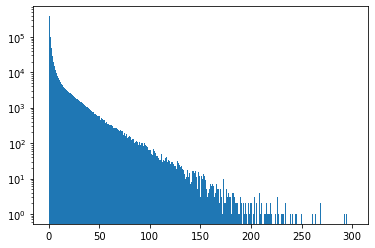

In [25]:
binsize_liftime = 1
bins_lifetime = np.arange(0-binsize_liftime/2, 300 + 3*binsize_liftime/2, binsize_liftime)

_ = plt.hist(lifetimes_RMT, bins=bins_lifetime, log=True)

## Distribution of TRAP core attraction rates

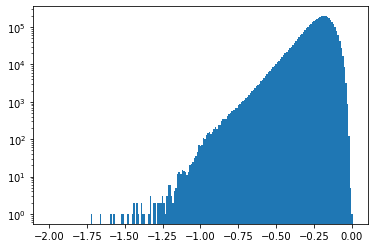

In [26]:
binsize_attraction = 0.01
bins_attraction = np.arange(-2-binsize_attraction/2, 0 + 3*binsize_attraction/2, binsize_attraction)

_ = plt.hist(core_attractions, bins=bins_attraction, log=True)

## Snapshot of TRAPs

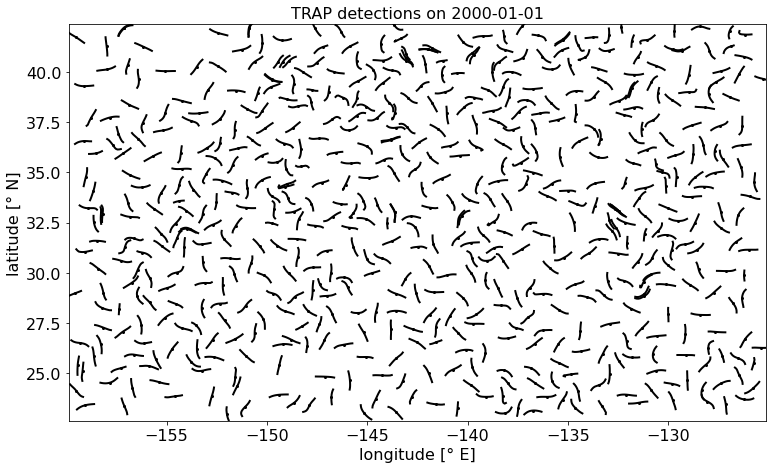

In [27]:
font_size = 16

number_of_snapshots = snapshots.size

# only one iteration for test runs
snapshot_indices = range(1) if notebook_run else range(number_of_snapshots)

for snapshot_index in snapshot_indices: # iterate through every daily snapshot

    #######################
    # CURRENT SNAPSHOT DATA
    #######################

    # filter for the objects of the current snapshot
    cs_filter_TRAPS = (timestamps==snapshots[snapshot_index]) # this gives a numpy array
        
    # get the currebnt objects
    cs_core_lons = core_lons[cs_filter_TRAPS]
    cs_core_lats = core_lats[cs_filter_TRAPS]
    cs_curve_lons = curve_lons[cs_filter_TRAPS]
    cs_curve_lats = curve_lats[cs_filter_TRAPS]

    
    ######################
    # BASE PLOT
    ######################
    
    fig =  plt.figure(figsize=(12.5, 8), facecolor='white', tight_layout=False)

    gs = GridSpec(1, 1, figure=fig)
    
    # define the axes
    axs = fig.add_subplot(gs[0])
    
    axs.set_aspect('equal')

    axs.set_xlim(wbound_CVD, ebound_CVD)
    axs.set_ylim(sbound_CVD, nbound_CVD)
    
    axs.set_xlabel(r'longitude [° E]', fontsize=font_size, color='black')
    axs.set_ylabel(r'latitude [° N]', fontsize=font_size, color='black')
    
    #set tick labels font size for both axes
    axs.tick_params(axis='both', which='major', labelsize=font_size)
    
    plot_title = r'TRAP detections on ' + snapshot_strings[snapshot_index]
    axs.set_title(plot_title, fontweight='normal', fontsize=font_size, color='black')
                  
    ######################
    # TRAPS
    ######################

    TRAP_colour = 'black'
    
    axs.scatter(cs_core_lons, cs_core_lats, color=TRAP_colour, edgecolor=TRAP_colour, s=4)
    
    for ccurve_ix in range(cs_curve_lons.size):
        
        axs.plot(cs_curve_lons[ccurve_ix], cs_curve_lats[ccurve_ix], color=TRAP_colour, lw=2)
        
    
    #################
    # SAVE PLOT
    #################
    
    figure_name_prefix = vel_product_short + epsilon_string + '_TRAPS'

    figure_name_suffix = '_' + snapshots[snapshot_index].strftime('%Y%m%d') + '.png'
    
    figure_name = figure_name_prefix + figure_name_suffix
    
    # all snapshots shall be saved in one specific folder
    figure_path = 'export_figs/' + figure_name_prefix + '/'

                  
    if save_fig: 
        # create the folder that contains all snapshots
        if not os.path.exists(figure_path): os.mkdir(figure_path)
        # and save the current image
        fig.savefig(figure_path + figure_name, dpi=300, bbox_inches='tight') # the last argument crops the figure to content!
        # show progress in terminal
        print('saved ' + figure_name + ' at snapshot_index ' 
              + str(snapshot_index+1).zfill(len(str(number_of_snapshots))) + '/' + str(number_of_snapshots))

    if notebook_run: plt.show()
    else: plt.close()

## TRAP trajectories

In [28]:
# define the number of trajectories to plot
rank_size = 1000 # 1000 trajectories take a moment to be plot

# get the origin IDs of the trajectories to plot
# and flip the array such that the most persistent trajectory
# will be plotted on top
origin_IDs_toplot = np.flip(origin_IDs_RMT[:rank_size])
lifetimes_toplot = np.flip(lifetimes_RMT[:rank_size])

# define the persistency ranking colormap
min_lifetime_val = np.min(lifetimes_toplot[0])
max_lifetime_val = np.max(lifetimes_toplot[-1])

cmap_name = 'jet'
cmap = plt.get_cmap(cmap_name)

norm = plt.Normalize(min_lifetime_val, max_lifetime_val)

# the colourbar function handles floats automatically
cbar_ticks = np.linspace(min_lifetime_val, max_lifetime_val, 3)

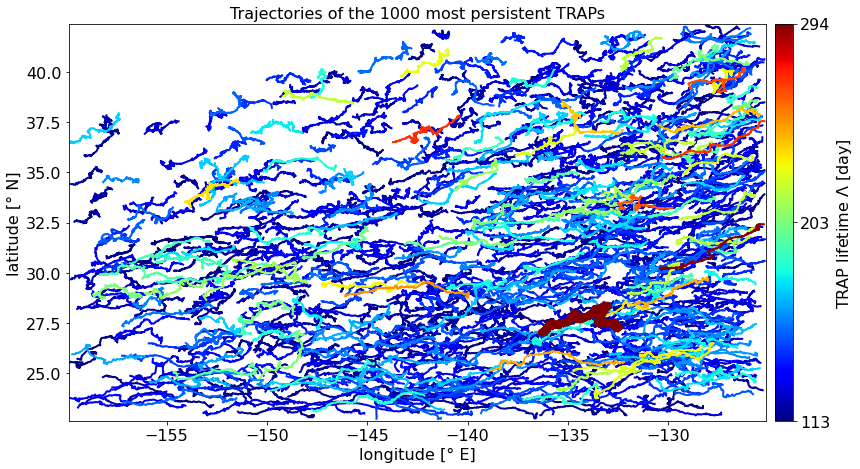

In [29]:
######################
# BASE PLOT
######################

fig =  plt.figure(figsize=(12.5, 8), facecolor='white', tight_layout=False)

gs = GridSpec(1, 1, figure=fig)

# define the axes
axs = fig.add_subplot(gs[0])

axs.set_aspect('equal')

axs.set_xlim(wbound_CVD, ebound_CVD)
axs.set_ylim(sbound_CVD, nbound_CVD)

axs.set_xlabel(r'longitude [° E]', fontsize=font_size, color='black')
axs.set_ylabel(r'latitude [° N]', fontsize=font_size, color='black')

#set tick labels font size for both axes
axs.tick_params(axis='both', which='major', labelsize=font_size)

plot_title = 'Trajectories of the {:.0f} most persistent TRAPs'.format(rank_size)
axs.set_title(plot_title, fontweight='normal', fontsize=font_size, color='black')


######################
# TRAJECTORIES
######################

trajectory_indices = range(rank_size)

for ix in trajectory_indices:

    # plot the most persistent trajectory extra thick
    linewidth = 2 if ix < trajectory_indices[-1] else 8

    # filter the overall dataframe for the current trajectory
    corigin_ID_filter = (origin_IDs==origin_IDs_toplot[ix])
    
    clons = core_lons[corigin_ID_filter]
    clats = core_lats[corigin_ID_filter]
    
    axs.plot(clons, clats, color=cmap(norm(lifetimes_toplot[ix])), lw=linewidth)

    
######################
# COLOUR MAP
######################

# add an axes to the current figure and make it the current axes
# [left, bottom, width, height] defines the dimensions of the new axes on the current figure
if notebook_run: 
    cax = plt.axes([0.91, 0.158, 0.02, 0.69])
# axes move a bit upwards when running as python script
else: 
    cax = plt.axes([0.91, 0.151, 0.02, 0.688])

# create the colourbar on cax
cbar = plt.colorbar(cm.ScalarMappable(norm=norm, cmap=cmap_name),
                    cax=cax, orientation='vertical', ticks=cbar_ticks)

cbar_label = r'TRAP lifetime $\Lambda\ \left[\rm{day}\right]$'

# customise colorbar ticklabels
cbar.ax.set_yticklabels(cbar_ticks.astype(int), fontsize=font_size)
cbar.set_label(label=cbar_label, size=font_size)



#################
# SAVE PLOT
#################

figure_name = vel_product_short + epsilon_string + '_TRAPS_TRAJECTORIES_TOP{:.0f}.png'.format(rank_size)

figure_path = 'export_figs/'


if save_fig: 
    # create the folder that contains all snapshots
    if not os.path.exists(figure_path): os.mkdir(figure_path)
    # and save the current image
    fig.savefig(figure_path + figure_name, dpi=300, bbox_inches='tight') # the last argument crops the figure to content!

if notebook_run: plt.show()
else: plt.close()

## Zonal propagation speed $c_x$

Show the latitudinal dependence of the zonal propagation speed of TRAPs.

### Bin zonal velocities

In [30]:
# due to the tracking algorithm, there are no TRAPs between the AVD and the CVD margin
# and also the number of TRAPs close to the CVD boundary will be biased, creating spikes at the end of the graphs
# thus we have to bin the data for an even smaller domain
wbound_BINS = wbound_AVD + 0.5
ebound_BINS = ebound_AVD - 0.5
sbound_BINS = sbound_AVD + 0.5
nbound_BINS = nbound_AVD - 0.5

In [31]:
# to only trigger integer and no NaN bin indices when using pd.cut() we have to remove nan velocities beforehand
nn_filter_TRAPS = (~np.isnan(pd_TRAPS_df.core_U))

pd_TRAPS_nndf = pd_TRAPS_df[nn_filter_TRAPS].copy()

# reset the index after cropping
pd_TRAPS_nndf.reset_index(drop=True, inplace=True)

In [32]:
# and we have to remove all data on or beyond these new boundaries 
# in order to obtain no nan values in the binning process
# the histogram bin intervals will be left-open, right-closed and the first interval should not be left-inclusive 
# since this would skew the histogram results. As a consequence, we obtain different comparisons at the boundaries.
binbounds_traps_filter = ((pd_TRAPS_nndf.core_lon>wbound_BINS) & (pd_TRAPS_nndf.core_lon<=ebound_BINS) & 
                          (pd_TRAPS_nndf.core_lat>sbound_BINS) & (pd_TRAPS_nndf.core_lat<=nbound_BINS))

# crop the velocity domain, i.e. filter for TRAP objects only within the CVD 
# VB like for velocity binning
pd_TRAPS_4VB_df = pd_TRAPS_nndf[binbounds_traps_filter].copy()

# reset the index after cropping
pd_TRAPS_4VB_df.reset_index(drop=True, inplace=True)

In [33]:
number_of_TRAPS_4VB_instances = pd_TRAPS_4VB_df.index.size

In [34]:
# print check
number_of_TRAPS_4VB_instances

2951028

In [35]:
#binsize_lat = 0.25
binsize_lat = 0.5
#binsize_lat = 2

bins_05_lat = np.arange(sbound_BINS, nbound_BINS + binsize_lat, binsize_lat)

# bindex for bin index
pd_TRAPS_4VB_df['bindex_05_lat'] = pd.cut(pd_TRAPS_4VB_df.core_lat, bins_05_lat, labels=False, include_lowest=False)

In [36]:
# create common bin indices arrays, actually that's
# the same as bindices_05_lat==np.arange(bins_05_lat.size-1)
bindices_05_lat = np.unique(pd_TRAPS_4VB_df.bindex_05_lat)

# assert that we have no nans in the bindices
assert sum(np.isnan(bindices_05_lat))==0, 'found nan value among bin indices'

In [37]:
#########################
# MERIDIONAL BINNING
#########################

core_U_latbinned = []

for current_bindex in bindices_05_lat:
    
    current_bindex_filter = (pd_TRAPS_4VB_df.bindex_05_lat==current_bindex)    
    core_U_latbinned.append(pd_TRAPS_4VB_df[current_bindex_filter].core_U.to_numpy(copy=True))
        

# Creating an ndarray from ragged nested sequences must be specified with 'dtype=object'
core_U_latbinned = np.array(core_U_latbinned, dtype=object)

### Get bin means

In [38]:
core_U_latbinned_means = np.array([np.nanmean(bin_array) for bin_array in core_U_latbinned])

### Get confidence intervals

In [39]:
# confidence level e.g. 99%
confidence_level = 0.95

In [40]:
# for every bin, calculate the standard error of the mean SEM = (variance**2/(n*(n-1)))**0.5
core_U_latbinned_sems = np.array([np.std(bin_array, ddof=1) / np.sqrt(bin_array.size) for bin_array in core_U_latbinned])

# calculate the z-score for the desired confidence level
z_score = np.abs(np.round(stats.norm.ppf((1 - confidence_level) / 2), 2))

# calculate the margin of error MOE using the SEM and z-score
core_U_latbinned_moes = z_score * core_U_latbinned_sems

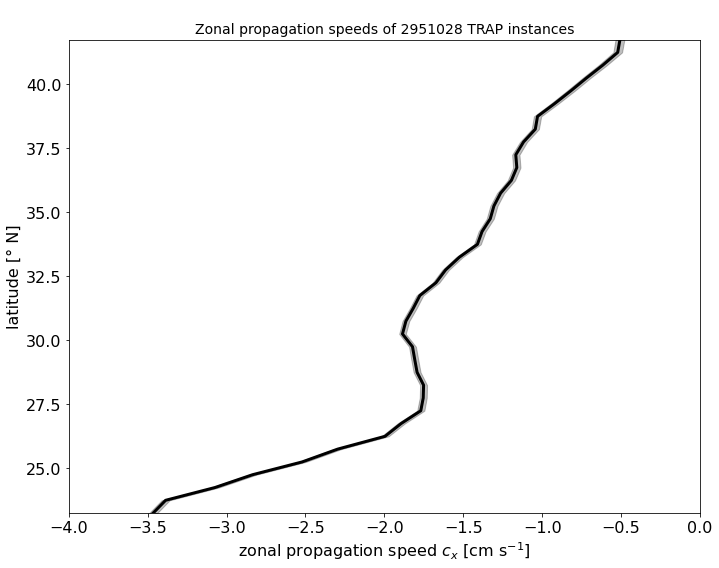

In [41]:
# create the figure
fig =  plt.figure(figsize=(12.5, 8), facecolor='white', tight_layout=True)

gs = GridSpec(1, 1, figure=fig, height_ratios=[1])

# define the axes
axs = fig.add_subplot(gs[0])

# axs.set_aspect('equal')
axs.set_box_aspect(0.75)

font_size = 16

#set tick labels font size for both axes
axs.tick_params(axis='both', which='major', labelsize=font_size)

axs.set_xlabel('zonal propagation speed ' + r'$c_{x}\ \left[\rm{cm}\ s^{-1}\right]$', fontsize=font_size)
axs.set_ylabel(r'latitude [° N]', fontsize=font_size)

# TRAPS
axs.fill_betweenx(bins_05_lat[:-1] + binsize_lat/2, 
                        (core_U_latbinned_means-core_U_latbinned_moes)*100, 
                        (core_U_latbinned_means+core_U_latbinned_moes)*100, 
                        alpha=0.25, edgecolor=TRAP_colour, facecolor=TRAP_colour)

axs.plot(core_U_latbinned_means*100, bins_05_lat[:-1] + binsize_lat/2, 
               color=TRAP_colour, ls='solid', lw=3, zorder=3, label='TRAPs')


# harmonise axis limits
axs.set_xlim(-4, 0)
axs.set_ylim(bins_05_lat[0] + binsize_lat/2, bins_05_lat[-2] + binsize_lat/2)


# build title at the end
plot_title = '\nZonal propagation speeds of {:.0f} TRAP instances'.format(number_of_TRAPS_4VB_instances)
axs.set_title(plot_title, fontweight='normal', fontsize=font_size-2, color='black')


#################
# save plot
#################

figure_name = vel_product_short + epsilon_string + '_TRAPS_ZONAL_PROPAGATION.png'

figure_path = 'export_figs/'


if save_fig: 
    # create the folder that contains all snapshots
    if not os.path.exists(figure_path): os.mkdir(figure_path)
    # and save the current image
    fig.savefig(figure_path + figure_name, dpi=300, bbox_inches='tight') # the last argument crops the figure to content!

if notebook_run: plt.show()
else: plt.close()


## Histogram of drifter-TRAP retention times

### Define the samples to plot

In [42]:
# we just want to look at pairs with retention times greater than 1 day
samples_to_plot = (retention_times>1)

# numbers of samples
number_of_S2PLT = sum(samples_to_plot)
number_of_S2PLT_DROGUED = sum(samples_to_plot & drogueds)
number_of_S2PLT_UNDROGUED = sum(samples_to_plot & ~drogueds)

### Bin retention times

In [43]:
binsize_phi = 1

bins_phi = np.arange(1-binsize_phi/2, 50+3*binsize_phi/2, binsize_phi)

bin_centers_phi = bins_phi[:-1] + binsize_phi/2

In [44]:
# PDFS
phi_hist_S2PLT_DROGUED = plt.hist(retention_times[samples_to_plot & drogueds], bins=bins_phi, density=True, log=False)
phi_hist_S2PLT_UNDROGUED = plt.hist(retention_times[samples_to_plot & ~drogueds], bins=bins_phi, density=True, log=False)

phi_PDFS_S2PLT_DROGUED = phi_hist_S2PLT_DROGUED[0]
phi_PDFS_S2PLT_UNDROGUED = phi_hist_S2PLT_UNDROGUED[0]

plt.close()

In [45]:
mean_retention_S2PLT = np.mean(retention_times[samples_to_plot])
mean_retention_S2PLT_DROGUED = np.mean(retention_times[samples_to_plot & drogueds])
mean_retention_S2PLT_UNDROGUED = np.mean(retention_times[samples_to_plot & ~drogueds])

std_retention_S2PLT = np.std(retention_times[samples_to_plot])
std_retention_S2PLT_DROGUED = np.std(retention_times[samples_to_plot & drogueds])
std_retention_S2PLT_UNDROGUED = np.std(retention_times[samples_to_plot & ~drogueds])

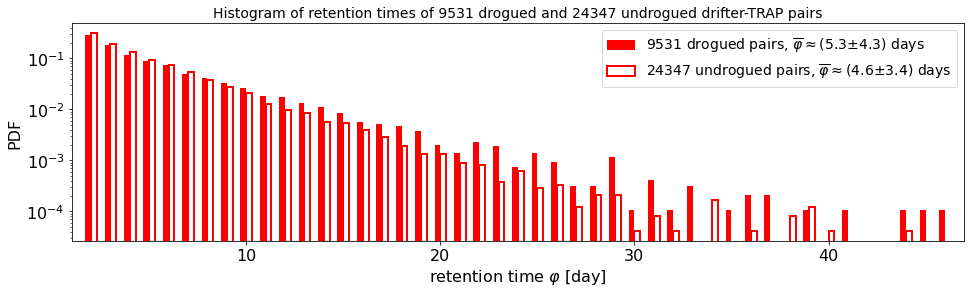

In [46]:
fig =  plt.figure(figsize=(16, 4), facecolor='white')

gs = GridSpec(1, 1, figure=fig, width_ratios=[1])

# define the axes
axs = fig.add_subplot(gs[0])

font_size = 16

#################
# PDFS
#################

axs.set_xlabel(r'retention time $\varphi$ [day]', fontsize=font_size)
axs.set_ylabel(r'PDF', fontsize=font_size)

#set tick labels font size for both axes
axs.tick_params(axis='both', which='major', labelsize=font_size)

label_DROGUED = '{:.0f} drogued pairs, '.format(number_of_S2PLT_DROGUED)
label_DROGUED += r'$\overline{\varphi}\approx$' + '({:.1f}$\pm${:.1f}) days'.format(np.around(mean_retention_S2PLT_DROGUED,1), np.around(std_retention_S2PLT_DROGUED,1))

label_UNDROGUED = '{:.0f} undrogued pairs, '.format(number_of_S2PLT_UNDROGUED)
label_UNDROGUED += r'$\overline{\varphi}\approx$' + '({:.1f}$\pm${:.1f}) days'.format(np.around(mean_retention_S2PLT_UNDROGUED,1), np.around(std_retention_S2PLT_UNDROGUED,1))


axs.bar(bin_centers_phi-0.15, phi_PDFS_S2PLT_DROGUED, align='center', log=True, width=0.3,
            color='red', ls='solid', lw=2, zorder=3, label=label_DROGUED)

axs.bar(bin_centers_phi+0.15, phi_PDFS_S2PLT_UNDROGUED, align='center', log=True, width=0.3,
            facecolor='white', edgecolor='red', ls='solid', lw=2, zorder=3, label=label_UNDROGUED)


axs.set_xlim(1,47)

axs.legend(fontsize=font_size-2, loc=1)

plot_title = 'Histogram of retention times of {:.0f} drogued and {:.0f} undrogued drifter-TRAP pairs'.format(number_of_S2PLT_DROGUED, number_of_S2PLT_UNDROGUED)
axs.set_title(plot_title, fontweight='normal', fontsize=font_size-2, color='black')


#################
# save plot
#################

figure_name = vel_product_short + epsilon_string + '_' + gdp_product_short + '_TRAPS_DRIFTERS_HPS_RETENTIONTIMES_'
figure_name += rho_kmstring + '.png'

figure_path = 'export_figs/'


if save_fig: 
    # create the folder that contains all snapshots
    if not os.path.exists(figure_path): os.mkdir(figure_path)
    # and save the current image
    fig.savefig(figure_path + figure_name, dpi=300, bbox_inches='tight') # the last argument crops the figure to content!

if notebook_run: plt.show()
else: plt.close()

# End sound

In [47]:
# measure the computation time for the entire script
stop_script_timer = time.perf_counter()
print(f'overall computation time: {stop_script_timer - start_script_timer:0.3f} seconds')

overall computation time: 165.160 seconds


In [48]:
#https://gist.github.com/tamsanh/a658c1b29b8cba7d782a8b3aed685a24

framerate = 4410
play_time_seconds = 1

t = np.linspace(0, play_time_seconds, framerate*play_time_seconds)
# G-Dur
#audio_data = np.sin(2*np.pi*391*t) + np.sin(2*np.pi*493*t) + np.sin(2*np.pi*587*t)
# D-Dur
audio_data = np.sin(2*np.pi*293*t) + np.sin(2*np.pi*369*t) + np.sin(2*np.pi*440*t)
Audio(audio_data, rate=framerate, autoplay=True)